- Name: Shah Huq 
- PSID: 2031297 
- GitHub: adyan0820

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [5]:
data = pd.read_csv('winequality.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Question 1

In [8]:
#get statistical summary of data 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Two of my favorite statistical measures are the mean and std. For this speciic data set the mean helps see what the average or expected quality of the wine is which as we can see from here is on average a wine is expected to be good. The standard deviation is useful because it can help us identify which variables are pretty consistent across the different wines and which variables high variability. The variables with high variability can be an indication of them being good predictors for the quality of the wine.

### Question 2

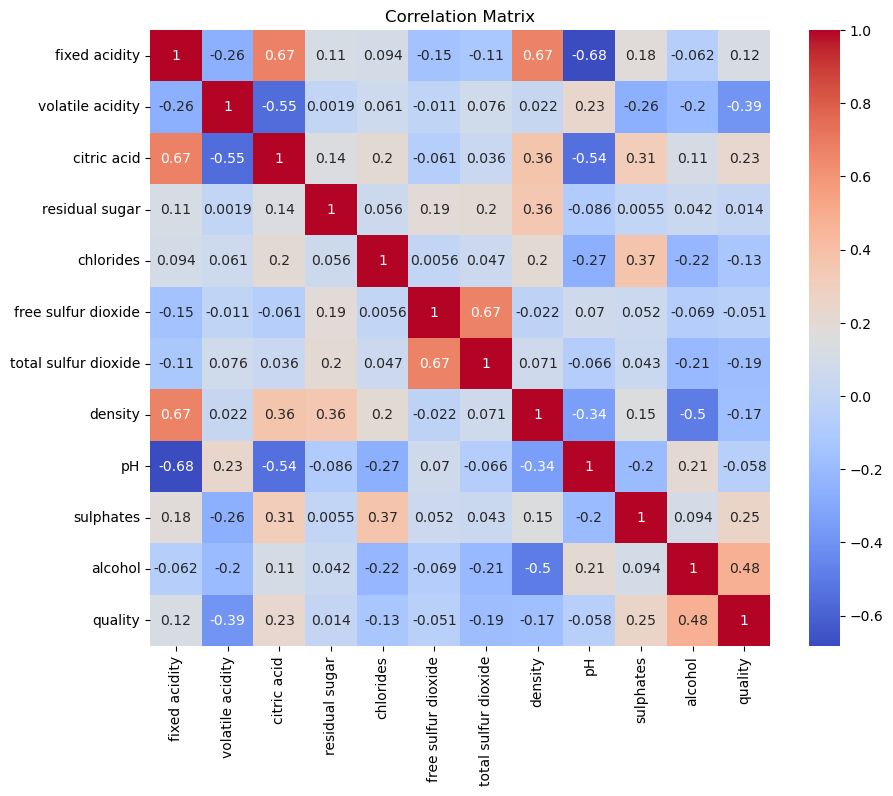

In [10]:
correlation = data.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that the alcohol percentage and volatile acidity show a strong correlation with the quality and could be good predictors for the quality. We can see the highest positive correlation between fixed acidity and citric acid and also between fixed acidity and density. Total sulfur dioxide and fixed sulfur dioxide also have a high correlation. The highest negative correlation can be seen between pH and fixed acidity. We can also see other high negative correlations between pH and citric acid and also between alcohol and density. These pair of attributes that have a high correlation can all be used as good predictors for each other and because of this also if we're predicting the quality then we for these pairs that have a high correlation we can possibly see similar performance by just picking one of the two variables since they could just be saying the same story.